In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


# Q1

In [4]:
Q1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3),kernel_initializer="he_uniform", activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128,activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
Q1.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("MODEL_Q1.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)


In [6]:
Q1_history = Q1.fit(X_train, y_train, epochs=250,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/250
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5667 - accuracy: 0.7983 - val_loss: 0.4920 - val_accuracy: 0.8146
Epoch 2/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4035 - accuracy: 0.8571 - val_loss: 0.3718 - val_accuracy: 0.8768
Epoch 3/250
1719/1719 [==============================] - 23s 14ms/step - loss: 0.3576 - accuracy: 0.8724 - val_loss: 0.3355 - val_accuracy: 0.8842
Epoch 4/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3276 - accuracy: 0.8822 - val_loss: 0.3228 - val_accuracy: 0.8866
Epoch 5/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3058 - accuracy: 0.8902 - val_loss: 0.3240 - val_accuracy: 0.8846
Epoch 6/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2890 - accuracy: 0.8950 - val_loss: 0.3086 - val_accuracy: 0.8952
Epoch 7/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2746 - accuracy: 0.9007 - val_loss: 0

In [7]:
Q1_score = Q1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Q1_score[0])
print('Test accuracy:', Q1_score[1])

Test loss: 0.24591003358364105
Test accuracy: 0.9128000140190125


# Q2

In [8]:
Q2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3),kernel_initializer="he_uniform", activation='sigmoid', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128,activation="sigmoid", kernel_initializer="he_uniform"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
optimaizer = keras.optimizers.SGD(lr=0.01*5, decay=1e-6)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
Q2.compile(loss = "sparse_categorical_crossentropy",
              optimizer=optimaizer,
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("MODEL_Q2.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)


In [11]:
Q2_history = Q2.fit(X_train, y_train, epochs=250,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/250
1719/1719 [==============================] - 31s 18ms/step - loss: 0.3946 - accuracy: 0.8573 - val_loss: 0.3202 - val_accuracy: 0.8822
Epoch 2/250
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2763 - accuracy: 0.8996 - val_loss: 0.3348 - val_accuracy: 0.8788
Epoch 3/250
1719/1719 [==============================] - 30s 17ms/step - loss: 0.2306 - accuracy: 0.9154 - val_loss: 0.2524 - val_accuracy: 0.9088
Epoch 4/250
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1982 - accuracy: 0.9282 - val_loss: 0.2991 - val_accuracy: 0.8868
Epoch 5/250
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1719 - accuracy: 0.9368 - val_loss: 0.2490 - val_accuracy: 0.9102
Epoch 6/250
1719/1719 [==============================] - 30s 18ms/step - loss: 0.1490 - accuracy: 0.9450 - val_loss: 0.2524 - val_accuracy: 0.9138
Epoch 7/250
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1305 - accuracy: 0.9527 - val_loss: 0

In [12]:
Q2_score = Q2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Q2_score[0])
print('Test accuracy:', Q2_score[1])

Test loss: 0.2734493017196655
Test accuracy: 0.9060999751091003


# Q3

In [15]:
Q3 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3),kernel_initializer="he_uniform", activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128,activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
optimaizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [26]:
Q3.compile(loss = "sparse_categorical_crossentropy",
              optimizer=optimaizer,
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("MODEL_Q3.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [27]:
Q3_history = Q3.fit(X_train, y_train, epochs=250,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/250
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4256 - accuracy: 0.8400 - val_loss: 0.4672 - val_accuracy: 0.8354
Epoch 2/250
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4115 - accuracy: 0.8436 - val_loss: 0.4594 - val_accuracy: 0.8368
Epoch 3/250
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4057 - accuracy: 0.8447 - val_loss: 0.4528 - val_accuracy: 0.8404
Epoch 4/250
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4013 - accuracy: 0.8468 - val_loss: 0.4516 - val_accuracy: 0.8408
Epoch 5/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3979 - accuracy: 0.8475 - val_loss: 0.4523 - val_accuracy: 0.8404
Epoch 6/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3954 - accuracy: 0.8482 - val_loss: 0.4468 - val_accuracy: 0.8432
Epoch 7/250
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3931 - accuracy: 0.8483 - val_loss: 0

In [29]:
Q3_score = Q3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', Q3_score[0])
print('Test accuracy:', Q3_score[1])

Test loss: 0.4416311979293823
Test accuracy: 0.8434000015258789


# COMPARACIÓN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

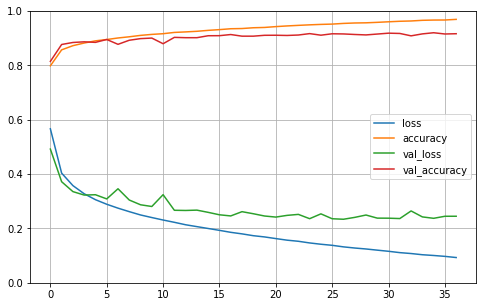

Test loss: 0.24591003358364105
Test accuracy: 0.9128000140190125


In [20]:
pd.DataFrame(Q1_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print('Test loss:', Q1_score[0])
print('Test accuracy:', Q1_score[1])

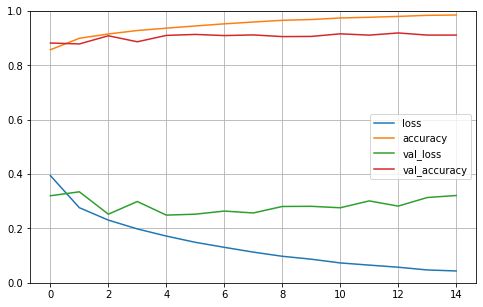

Test loss: 0.2734493017196655
Test accuracy: 0.9060999751091003


In [22]:
pd.DataFrame(Q2_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print('Test loss:', Q2_score[0])
print('Test accuracy:', Q2_score[1])

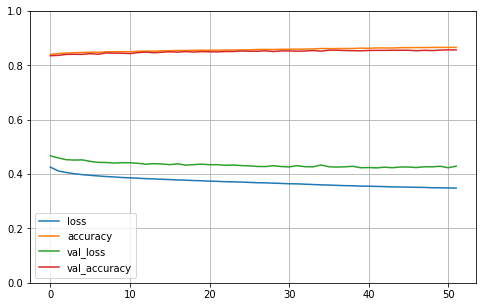

Test loss: 0.4416311979293823
Test accuracy: 0.8434000015258789


In [30]:
pd.DataFrame(Q3_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print('Test loss:', Q3_score[0])
print('Test accuracy:', Q3_score[1])